# Funciones de Distribucion de Probabilidades

## Distribución Uniforme 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99815.,  99820.,  99595.,  99874., 100839., 100629.,  99597.,
         99490., 100047., 100294.]),
 array([ 1.00004435, 10.90001446, 20.79998458, 30.6999547 , 40.59992481,
        50.49989493, 60.39986505, 70.29983516, 80.19980528, 90.0997754 ,
        99.99974551]),
 <BarContainer object of 10 artists>)

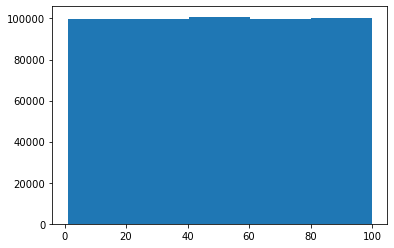

In [17]:
# Acá se demuestra que de 1 millon de numeros aleatorios de 1 a 100, cada uno tiene la misma probabilidad de salir
%matplotlib inline
plt.hist(data)

## Distribución Normal (Campana de Gaus)

In [22]:
# Campana de Gaus para 1 millon de valores aleatorios
data = np.random.randn(1000000)

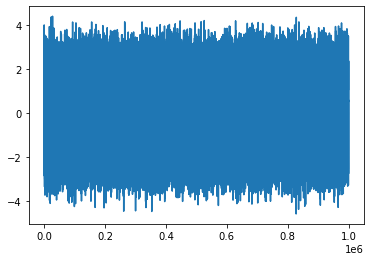

In [27]:
x = range(1, 1000001)
plt.plot(x, data)

(array([1.09000e+02, 2.44000e+03, 2.64780e+04, 1.31856e+05, 3.03869e+05,
        3.27321e+05, 1.64837e+05, 3.86120e+04, 4.24700e+03, 2.31000e+02]),
 array([-4.60007494, -3.69804529, -2.79601563, -1.89398597, -0.99195631,
        -0.08992666,  0.812103  ,  1.71413266,  2.61616232,  3.51819197,
         4.42022163]),
 <BarContainer object of 10 artists>)

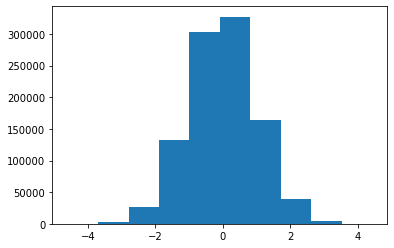

In [24]:
plt.hist(data)
# Acá se genera un gráfico típico con media = 0 y Desviacion Estandar = -1, 1

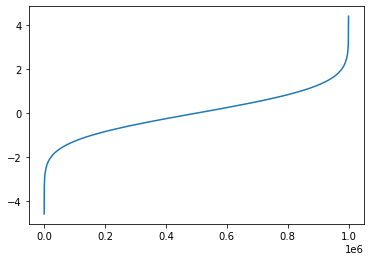

In [28]:
plt.plot(x, sorted(data))

In [35]:
# Si necesitamos que la Desviacion Estandar sea distinto a -1 y 1
mu = 5.5 # Media
sd = 2.5 # Desviación Estandar
z_10000 = np.random.randn(10000) # La Normal
data = mu + sd * z_10000 # z = (X - mu) / sd -> N(0,1), X = mu + sd * z

(array([  29.,  156.,  730., 1953., 2839., 2531., 1295.,  397.,   59.,
          11.]),
 array([-3.37476393, -1.50253473,  0.36969447,  2.24192367,  4.11415287,
         5.98638207,  7.85861127,  9.73084048, 11.60306968, 13.47529888,
        15.34752808]),
 <BarContainer object of 10 artists>)

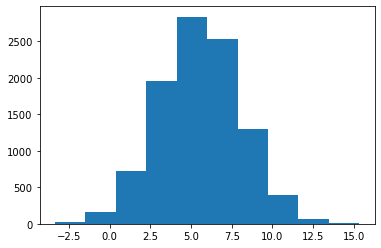

In [36]:
# Acá el gráfico muestra una Campana de Gaus con media en 5.5 y Desviacion Estandar en -2.5, 2.5
plt.hist(data)

## La Simulación de Montecarlo para Encontrar π

#### Hay un círculo de radio r y diametro 2r, sobre un cuadrado de lado 2r. 
#### Al elegir un punto al azar, qué probabilidades hay que caiga dentro del círculo?

* Generar dos numeros aleatorios uniforme entre 0 y 1 ( x e y) en total 1000 veces
* Calcular x * x + y * y
 * Si el valor es inferior a 1 -> Estamos dentro del circulo
 * Si el valor es mayor a 1 -> Estamos dentro del circulo
* Calculamos el numero totl de veces que están deltro del círculo y lo dividimos entre el número total de intentos para  obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número sificiente de veces (por ejemplo 100), para obtener diferentes aproximaciones de π.
* Calculamos el promedio d elos 1000 experimentos anteriores para dar un valor final de π.

In [46]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1416000000000004


(3.1416000000000004, [<matplotlib.lines.Line2D at 0x7f852bb433a0>])

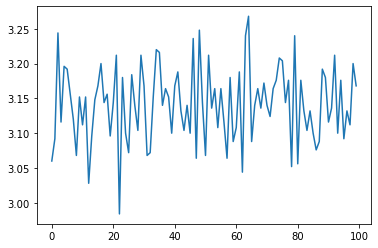

In [49]:
pi_montecarlo(1000, 100)

### Dummy Data Sets

In [65]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), # n numeros al azar con distribucion normal estandar (media = 0 y D. Estandar = 1)
        'B' : 1.5 + 2.5 * np.random.randn(n), # Media 1.5 y Desviacion Estandar 2.5
        'C' : np.random.uniform(5, 32, n) # Numeros random entre 5 y 32
    }
)

In [66]:
data.head()

,A,B,C
0,0.813061,0.259330,11.184051
1,-1.069867,0.791243,20.390960
2,0.693840,5.795129,8.357675
3,-0.724085,4.135032,27.785928
4,1.913562,0.446016,19.767492


In [67]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000010,1.501130,18.492624
std,1.000037,2.499391,7.795598
min,-5.128965,-10.373626,5.000008
25%,-0.674487,-0.181891,11.741146
50%,-0.000742,1.501678,18.498765
75%,0.674711,3.185877,25.238681
max,4.781059,13.979877,31.999953


(array([1.90000e+01, 7.89000e+02, 1.46470e+04, 1.06297e+05, 3.09446e+05,
        3.61482e+05, 1.72136e+05, 3.26450e+04, 2.46500e+03, 7.40000e+01]),
 array([-5.12896514, -4.1379627 , -3.14696026, -2.15595782, -1.16495538,
        -0.17395294,  0.8170495 ,  1.80805194,  2.79905438,  3.79005682,
         4.78105926]),
 <BarContainer object of 10 artists>)

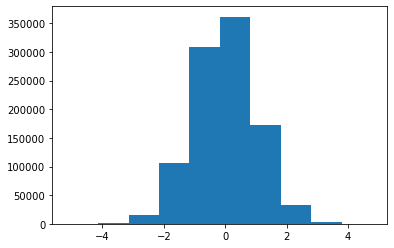

In [70]:
plt.hist(data["A"])

(array([8.00000e+01, 2.49800e+03, 3.13730e+04, 1.62737e+05, 3.51510e+05,
        3.14875e+05, 1.17587e+05, 1.81840e+04, 1.12000e+03, 3.60000e+01]),
 array([-10.37362612,  -7.93827577,  -5.50292542,  -3.06757506,
         -0.63222471,   1.80312564,   4.238476  ,   6.67382635,
          9.1091767 ,  11.54452706,  13.97987741]),
 <BarContainer object of 10 artists>)

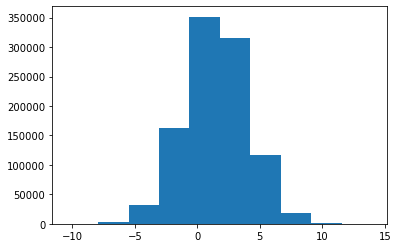

In [71]:
plt.hist(data["B"])

(array([100458., 100100.,  99696.,  99918.,  99871., 100149., 100264.,
         99899.,  99793.,  99852.]),
 array([ 5.00000821,  7.70000269, 10.39999716, 13.09999164, 15.79998612,
        18.4999806 , 21.19997508, 23.89996956, 26.59996403, 29.29995851,
        31.99995299]),
 <BarContainer object of 10 artists>)

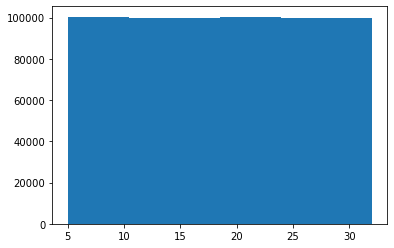

In [72]:
plt.hist(data["C"])

In [75]:
# Cargamos el dataset de Churnmodel
data = pd.read_csv("../../ReposCurso/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [76]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [77]:
column_names = data.columns.values.tolist()

In [78]:
a = len(column_names)
a

21

In [87]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a)
    }, index = range(42, 42 + a) # Si se pone un index, el dataset empieza en ese numero de fila (42)
)

In [85]:
new_data

,Column Name,A,B
42,State,1.701177,0.301102
43,Account Length,1.180453,0.423834
44,Area Code,0.299674,0.055385
45,Phone,1.759463,0.976687
46,Int'l Plan,2.886884,0.390108
47,VMail Plan,0.127576,0.199968
48,VMail Message,0.694793,0.048732
49,Day Mins,1.685085,0.369297
50,Day Calls,0.177614,0.062682
51,Day Charge,0.427688,0.832370
